In [1]:
import numpy as np
import matrix_dev
import matplotlib.pyplot as plt
import _pickle
import gensim
import gensim.corpora as corpora
import os
from pprint import pprint
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import spacy
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from lda_implementation import lda_model
lda = lda_model()

In [3]:
lda.load_data()

loading data
creating bigrams
creating dictionary
creating corpus
data loading complete


In [4]:
model = lda.lda_mallet_model(num_topics=34, iterations = 5000)

Coherence Score:  0.42091526426536313


In [5]:
model.save('../../feature_groups/lda_pickles/model')

In [6]:
best_model, values = lda.best_model_search(start = 2, end = 70, step = 4)

Num_topics =  2  corresponding coherence value:  0.3250600538264965
Num_topics =  6  corresponding coherence value:  0.38063035471914564
Num_topics =  10  corresponding coherence value:  0.4164274000523883
Num_topics =  14  corresponding coherence value:  0.41814946609436854
Num_topics =  18  corresponding coherence value:  0.43023805246564106
Num_topics =  22  corresponding coherence value:  0.43577648371891475
Num_topics =  26  corresponding coherence value:  0.42383656095954464
Num_topics =  30  corresponding coherence value:  0.4179432504101885
Num_topics =  34  corresponding coherence value:  0.39512749189922264
Num_topics =  38  corresponding coherence value:  0.4005331865521675
Num_topics =  42  corresponding coherence value:  0.403668686027043
Num_topics =  46  corresponding coherence value:  0.42857302676121634
Num_topics =  50  corresponding coherence value:  0.4165635179654942
Num_topics =  54  corresponding coherence value:  0.4189101721724433
Num_topics =  58  correspondin

In [7]:
best_model.save('../../feature_groups/lda_pickles/best_model')

In [8]:
lda.write_to_pickle('../../feature_groups/lda_pickles', 'bigram', lda.bigram)

writing bigram to pickle


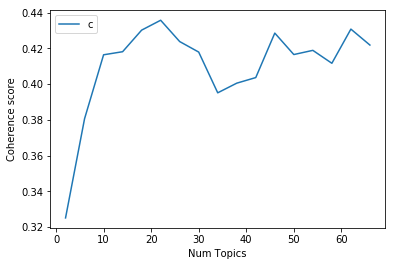

In [10]:
start=2
limit=70
step=4
x = range(start, limit, step)
plt.plot(x, values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [12]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_model)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, lda.corpus, lda.id2word)

In [13]:
vis

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
10     5.013158        1       1  0.000289 -0.000206
18     4.701180        1       2 -0.000514 -0.000420
13     4.600522        1       3 -0.000296 -0.000704
5      4.583612        1       4  0.000422 -0.000559
6      4.544907        1       5  0.000008  0.000049
14     4.544253        1       6  0.000045 -0.000261
0      4.544139        1       7  0.000091 -0.000140
8      4.539654        1       8 -0.000144  0.000518
9      4.537383        1       9 -0.000148  0.000100
11     4.524649        1      10 -0.000301 -0.000083
4      4.524086        1      11 -0.000290  0.000600
16     4.518746        1      12  0.000186 -0.000328
21     4.517816        1      13 -0.000409  0.000111
19     4.509653        1      14 -0.000710 -0.000094
15     4.491744        1      15 -0.000294  0.000146
20     4.482141        1      16  0.000628  0.000196
2      4.480827        1      17  0.000378  0.000669
7      4.478981        1      18 -0.000077  0.000371
17     4.478778        1      19 -0.000015  0.000042
1      4.474820        1      20  0.000630 -0.000104
12     4.468024        1      21  0.000097  0.000325
3      4.440928        1      22  0.000421 -0.000228, topic_info=      Category      Freq           Term     Total  loglift  logprob
term                                                               
88003  Default  5.000000          iyaak  5.000000  30.0000  30.0000
78395  Default  5.000000       kesukaan  5.000000  29.0000  29.0000
65905  Default  5.000000       phoenixx  5.000000  28.0000  28.0000
87669  Default  5.000000       instalaa  5.000000  27.0000  27.0000
47453  Default  5.000000         manolo  5.000000  26.0000  26.0000
76315  Default  5.000000          jaaaa  5.000000  25.0000  25.0000
31028  Default  5.000000  nealrauhauser  5.000000  24.0000  24.0000
23468  Default  5.000000            hgx  5.000000  23.0000  23.0000
72685  Default  5.000000   nikki_malone  5.000000  22.0000  22.0000
13563  Default  5.000000    certificate  5.000000  21.0000  21.0000
13366  Default  5.000000          beige  5.000000  20.0000  20.0000
81719  Default  5.000000         etmeli  5.000000  19.0000  19.0000
61478  Default  5.000000           ggdn  5.000000  18.0000  18.0000
84779  Default  5.000000      deerfield  5.000000  17.0000  17.0000
710    Default  5.000000       wkwkkwkk  5.000000  16.0000  16.0000
8619   Default  5.000000    socialskill  5.000000  15.0000  15.0000
64928  Default  5.000000       tangradi  5.000000  14.0000  14.0000
70311  Default  5.000000           kcry  5.000000  13.0000  13.0000
46175  Default  5.000000     sepertinya  5.000000  12.0000  12.0000
25288  Default  5.000000      littletik  5.000000  11.0000  11.0000
44558  Default  5.000000        yatrgdw  5.000000  10.0000  10.0000
85304  Default  5.000000  commercialssz  5.000000   9.0000   9.0000
69027  Default  5.000000        truther  5.000000   8.0000   8.0000
5688   Default  5.000000        proceed  5.000000   7.0000   7.0000
3252   Default  5.000000           huff  5.000000   6.0000   6.0000
79236  Default  5.000000          gzzbj  5.000000   5.0000   5.0000
40512  Default  5.000000        chasing  5.000000   4.0000   4.0000
62     Default  5.000000            usa  5.000000   3.0000   3.0000
32778  Default  5.000000          tzutc  5.000000   2.0000   2.0000
73138  Default  5.000000         mobiel  5.000000   1.0000   1.0000
...        ...       ...            ...       ...      ...      ...
62127  Topic22  0.330101        bleurgh  5.290333   0.3401 -11.0659
75062  Topic22  0.330377           rzni  5.313189   0.3366 -11.0650
24832  Topic22  0.325830        warrier  5.270717   0.3308 -11.0789
34540  Topic22  0.330835         ideeee  5.355814   0.3300 -11.0636
34103  Topic22  0.321785           lina  5.213451   0.3292 -11.0914
34928  Topic22  0.314084     onyooooooe  5.094344   0.3281 -11.1156
58864  Topic22  0.320143         